In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df= pd.read_csv('spam.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Data Cleaning

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.shape

(5572, 5)

In [7]:
df=df.drop(df[[
    'Unnamed: 2' ,'Unnamed: 3','Unnamed: 4']
],axis='columns')

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
#EDA



In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

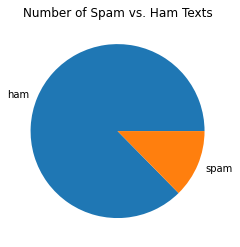

In [19]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'])
plt.title('Number of Spam vs. Ham Texts')
plt.show()

Text(0.5, 1.0, 'Number of Spam vs. Ham Texts')

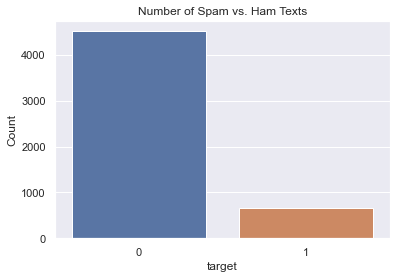

In [20]:
sns.set(style="darkgrid")
sns.countplot(x='target', data=df)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Number of Spam vs. Ham Texts')

In [21]:
########  dataset is imbalanced  #######

In [22]:
import nltk

In [23]:
df['num_of_characters'] = df['text'].apply(len)


<ipython-input-23-61101e6133d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_characters'] = df['text'].apply(len)


In [24]:
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#no of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-25-a2327e7d0694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [26]:
df.head()

,target,text,num_of_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-27-724e6ecfa519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [28]:
df.head()

,target,text,num_of_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_of_characters','num_words','num_sent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   num_of_characters  5169 non-null   int64
 1   num_words          5169 non-null   int64
 2   num_sent           5169 non-null   int64
dtypes: int64(3)
memory usage: 290.6 KB


In [30]:
df[['num_of_characters','num_words','num_sent']].describe()

,num_of_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==0][['num_of_characters','num_words','num_sent']].describe()

,num_of_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==1][['num_of_characters','num_words','num_sent']].describe()

,num_of_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_of_characters', ylabel='Count'>

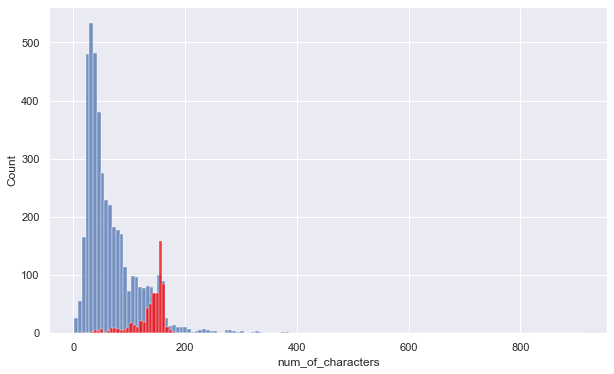

In [33]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df[df['target']==0]['num_of_characters'] )
sns.histplot(df[df['target']==1]['num_of_characters'] ,color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

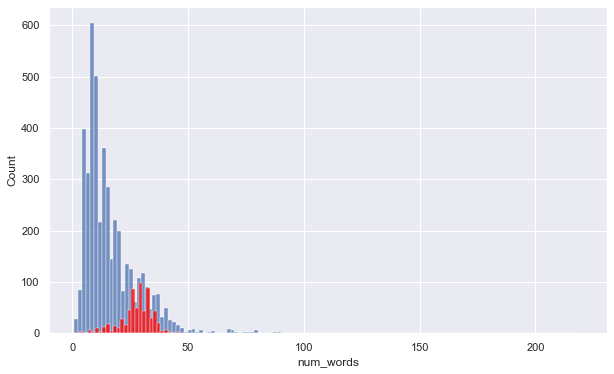

In [34]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df[df['target']==0]['num_words'] )
sns.histplot(df[df['target']==1]['num_words'] ,color='red')    

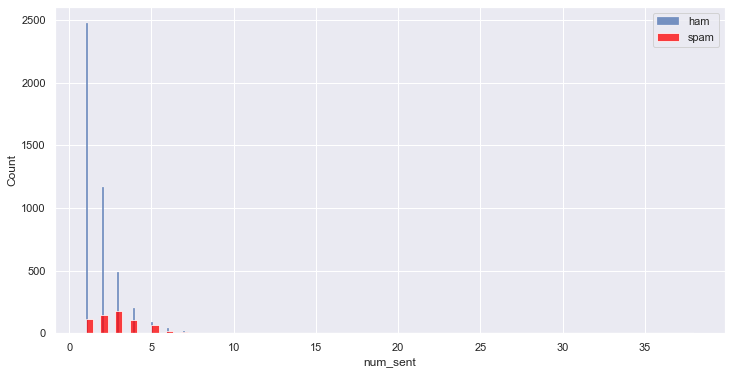

In [35]:
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the distribution for target 0
sns.histplot(df[df['target'] == 0]['num_sent'], label='ham')

# Plot the distribution for target 1
sns.histplot(df[df['target'] == 1]['num_sent'], label='spam',color= 'red')


plt.xlabel('num_sent')


# Display the legend
plt.legend()

# Display the plot
plt.show()

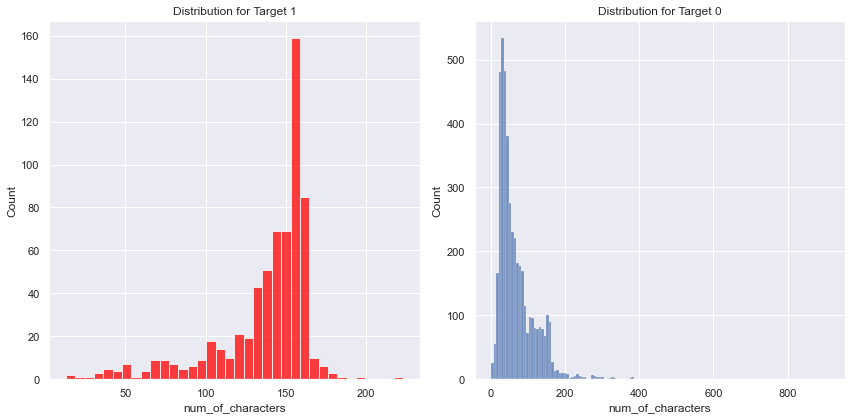

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the distribution for target 1
plt.subplot(1, 2, 1)  # Create a subplot for the first distribution
sns.histplot(df[df['target'] == 1]['num_of_characters'], color='red')
plt.title('Distribution for Target 1')
plt.xlabel('num_of_characters')
plt.ylabel('Count')

# Plot the distribution for target 0
plt.subplot(1, 2, 2)  # Create a subplot for the second distribution
sns.histplot(df[df['target'] == 0]['num_of_characters'])
plt.title('Distribution for Target 0')
plt.xlabel('num_of_characters')
plt.ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


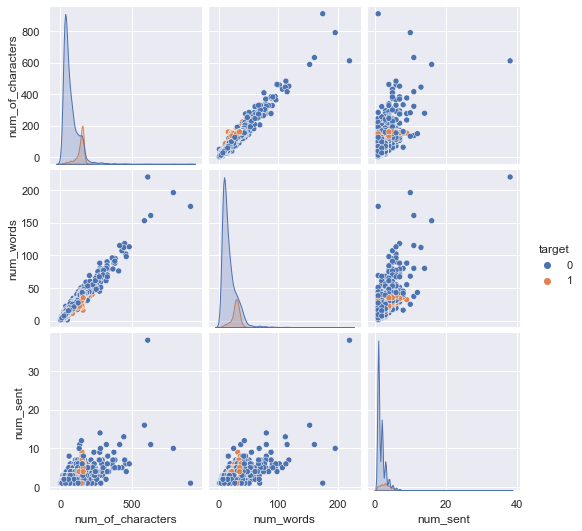

In [37]:
sns.pairplot(df,hue='target')

 #####  we can see outliers here

In [38]:
df.corr()

,target,num_of_characters,num_words,num_sent
target,1.000000,0.382785,0.263143,0.269132
num_of_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sent,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

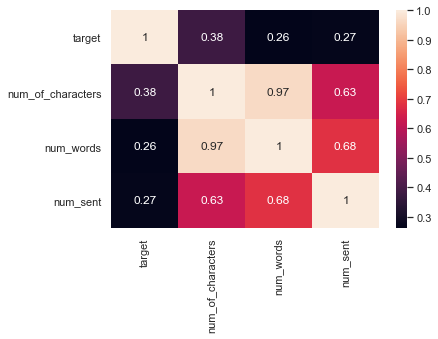

In [39]:
sns.heatmap(df.corr(),annot=True)

In [40]:
#####   Data Preprocessing ######

In [41]:
from nltk.corpus import stopwords
import string

In [42]:
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    
    text = y[:]
    y.clear()
    
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
            
            
    text = y[:]
    y.clear()  
    
    
    for i in text:
        y.append(ps.stem(i))
            
            
            

    
    return " ".join(y)

In [44]:
transform_text(' hii how are you gaurav?')

'hii gaurav'

In [45]:
transform_text('  Did you  like  my project in nlp?')

'like project nlp'

In [46]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [47]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [48]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
df.loc[:, 'transformed_text'] = df['text'].apply(transform_text)

C:\Users\GAURAV\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\GAURAV\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [50]:
df.head()

,target,text,num_of_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [52]:
from wordcloud import WordCloud
wc = WordCloud(height=2000,width=2000,min_font_size=10,background_color='white')

In [53]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

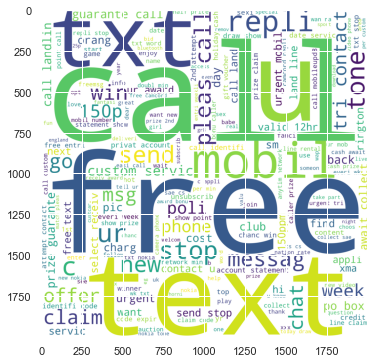

In [54]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

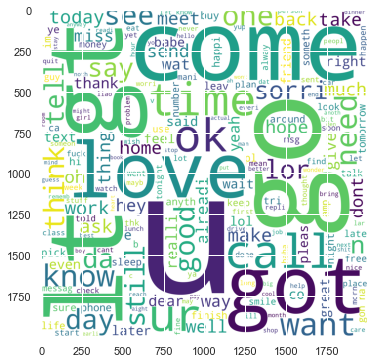

In [55]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_of_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
   

In [58]:
len(spam_corpus)

9941

In [59]:
df.head()

,target,text,num_of_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


C:\Users\GAURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


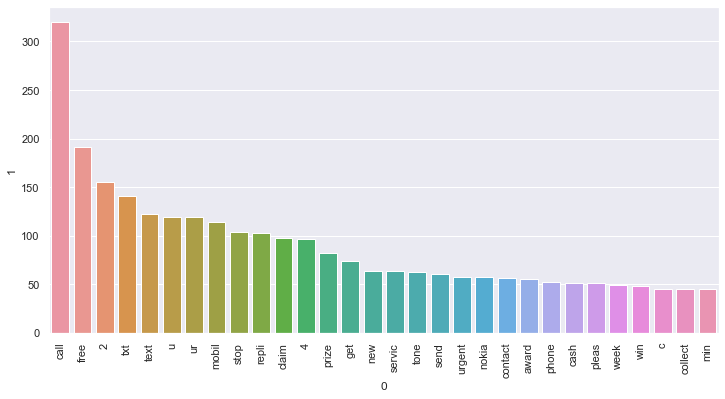

In [60]:
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]  , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35303

C:\Users\GAURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


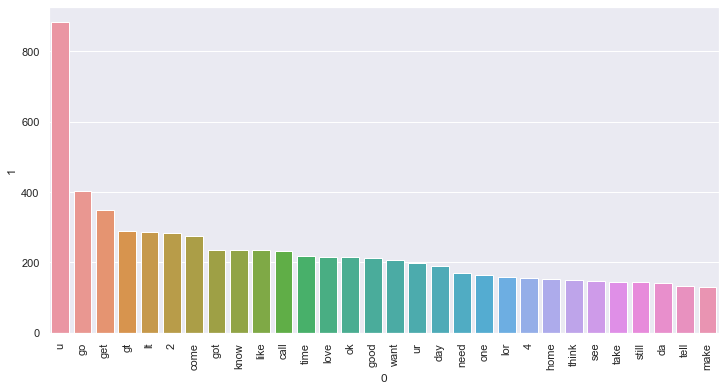

In [63]:
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0]  , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
### Model building ###

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [66]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5169, 6677)

In [68]:
y=df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.naive_bayes import GaussianNB ,  MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.88042203985932
[[1302  170]
 [  34  200]]
0.5405405405405406


In [75]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9747948417350527
[[1448   24]
 [  19  215]]
0.899581589958159


In [76]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9654161781946072
[[1468    4]
 [  55  179]]
0.9781420765027322


In [77]:
 ##################  tf-idf #######################3

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [79]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [81]:
from sklearn.naive_bayes import GaussianNB ,  MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [82]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [83]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8786635404454866
[[1303  169]
 [  38  196]]
0.536986301369863


In [84]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9513481828839391
[[1472    0]
 [  83  151]]
1.0


In [85]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9654161781946072
[[1468    4]
 [  55  179]]
0.9781420765027322


In [86]:
####### we will go with tfidf + mnb bcoz our data is imbalanced , and mnb is giving high precision  ########

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [88]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [89]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [90]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [92]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9730363423212193
Precision -  0.9653465346534653
For  KN
Accuracy -  0.8921453692848769
Precision -  1.0
For  NB
Accuracy -  0.9513481828839391
Precision -  1.0
For  DT
Accuracy -  0.9331770222743259
Precision -  0.8
For  LR
Accuracy -  0.9419695193434936
Precision -  0.8857142857142857
For  RF
Accuracy -  0.9677608440797186
Precision -  0.9890710382513661
For  AdaBoost
Accuracy -  0.9554513481828839
Precision -  0.9114583333333334
For  BgC
Accuracy -  0.9601406799531067
Precision -  0.8878504672897196
For  ETC
Accuracy -  0.9718640093786636
Precision -  0.9894736842105263
For  GBDT
Accuracy -  0.9501758499413834
Precision -  0.9570552147239264
For  xgb
Accuracy -  0.97010550996483
Precision -  0.9140271493212669


In [93]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending= False)

In [94]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.892145,1.000000
2,NB,0.951348,1.000000
8,ETC,0.971864,0.989474
5,RF,0.967761,0.989071
0,SVC,0.973036,0.965347
9,GBDT,0.950176,0.957055
10,xgb,0.970106,0.914027
6,AdaBoost,0.955451,0.911458
7,BgC,0.960141,0.887850
4,LR,0.941970,0.885714


In [ ]:
#######                          model improve                                    ######

In [95]:
  tfidf=TfidfVectorizer(max_features=3000)

In [96]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [97]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [98]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'ETC': etc,
}


In [99]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [100]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9794841735052755
Precision -  0.9715639810426541
For  NB
Accuracy -  0.9712778429073857
Precision -  0.9894179894179894
For  ETC
Accuracy -  0.9759671746776084
Precision -  0.9849246231155779


In [101]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending= False)

In [102]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.971278,0.989418
2,ETC,0.975967,0.984925
0,SVC,0.979484,0.971564


In [103]:
# Voting Classifier(extra)
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [104]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [105]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [106]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9830011723329426
Precision 0.9951690821256038


In [107]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [113]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806565064478312
Precision 0.9547511312217195


In [ ]:
#####

In [114]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open(' model.pkl','wb'))